## Prepare data

In [2]:
from data_loader import *

means, stdevs = (0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)
DATA_PATH = './data'
CIFAR10_CLASS_LABELS = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

train_loader, test_loader = generate_train_test_loader(DATA_PATH, means, stdevs, batch_size=128)

ModuleNotFoundError: No module named 'cv2'

## Visualise data

horse automobile automobile  deer  ship airplane horse  bird


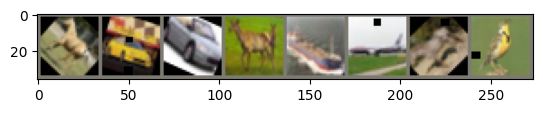

In [3]:
from utils import *
# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
# show images
imshow(torchvision.utils.make_grid(images[:8]),mean=[0.4914, 0.4822, 0.4465],std =[0.2023, 0.1994, 0.2010])
# print labels
print(' '.join('%5s' % CIFAR10_CLASS_LABELS[labels[j]] for j in range(8)))


## Network summary

In [4]:
from model import *
from torchsummary import summary

cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
device = torch.device("cuda" if cuda else "cpu")

model = CIFAR10_Network().to(device)
summary(model, input_size=(3, 32, 32))

CUDA Available? True
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           9,216
              ReLU-6           [-1, 32, 32, 32]               0
       BatchNorm2d-7           [-1, 32, 32, 32]              64
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 64, 32, 32]          18,432
             ReLU-10           [-1, 64, 32, 32]               0
      BatchNorm2d-11           [-1, 64, 32, 32]             128
          Dropout-12           [-1, 64, 32, 32]               0
           Conv2d-13           [-1, 32, 32, 32]           2,048
           Conv2d-

## Model training

In [7]:
from utils import *

train_losses1 = []
test_losses1 = []
train_acc1 = []
test_acc1 = []

test_incorrect_pred1 = {'images': [], 'ground_truths': [], 'predicted_vals': []}

dropout_value = 0.05
STEP_SIZE = 24

model1 = CIFAR10_Network(dropout_value=dropout_value).to(device)
optimizer = optim.SGD(model1.parameters(), lr=0.1, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=STEP_SIZE, gamma=0.1)
num_epochs = 25

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model1, device, train_loader, optimizer, train_acc1, train_losses1)
  test(model1, device, test_loader, test_acc1, test_losses1)
  if epoch <= STEP_SIZE:
    scheduler.step()

Epoch 1


Train: Loss=1.6040 Batch_id=390 Accuracy=34.22: 100%|██████████| 391/391 [00:28<00:00, 13.49it/s]


Test set: Average loss: 1.5968, Accuracy: 4068/10000 (40.68%)

Epoch 2


Train: Loss=1.5507 Batch_id=390 Accuracy=46.87: 100%|██████████| 391/391 [00:27<00:00, 14.22it/s]


Test set: Average loss: 1.2864, Accuracy: 5274/10000 (52.74%)

Epoch 3


Train: Loss=1.1627 Batch_id=390 Accuracy=53.79: 100%|██████████| 391/391 [00:27<00:00, 14.05it/s]


Test set: Average loss: 1.2001, Accuracy: 5793/10000 (57.93%)

Epoch 4


Train: Loss=1.1106 Batch_id=390 Accuracy=58.59: 100%|██████████| 391/391 [00:28<00:00, 13.95it/s]


Test set: Average loss: 1.0144, Accuracy: 6340/10000 (63.40%)

Epoch 5


Train: Loss=1.0396 Batch_id=390 Accuracy=61.56: 100%|██████████| 391/391 [00:28<00:00, 13.91it/s]


Test set: Average loss: 0.9696, Accuracy: 6565/10000 (65.65%)

Epoch 6


Train: Loss=0.8062 Batch_id=390 Accuracy=63.73: 100%|██████████| 391/391 [00:27<00:00, 13.98it/s]


Test set: Average loss: 0.8576, Accuracy: 6980/10000 (69.80%)

Epoch 7


Train: Loss=0.7377 Batch_id=390 Accuracy=66.19: 100%|██████████| 391/391 [00:27<00:00, 14.02it/s]


Test set: Average loss: 0.9154, Accuracy: 6926/10000 (69.26%)

Epoch 8


Train: Loss=0.8376 Batch_id=390 Accuracy=68.18: 100%|██████████| 391/391 [00:27<00:00, 14.02it/s]


Test set: Average loss: 0.7973, Accuracy: 7131/10000 (71.31%)

Epoch 9


Train: Loss=0.8773 Batch_id=390 Accuracy=69.16: 100%|██████████| 391/391 [00:28<00:00, 13.88it/s]


Test set: Average loss: 0.7631, Accuracy: 7322/10000 (73.22%)

Epoch 10


Train: Loss=0.5917 Batch_id=390 Accuracy=71.11: 100%|██████████| 391/391 [00:27<00:00, 14.01it/s]


Test set: Average loss: 0.7193, Accuracy: 7526/10000 (75.26%)

Epoch 11


Train: Loss=0.8671 Batch_id=390 Accuracy=71.98: 100%|██████████| 391/391 [00:28<00:00, 13.89it/s]


Test set: Average loss: 0.7217, Accuracy: 7514/10000 (75.14%)

Epoch 12


Train: Loss=0.9630 Batch_id=390 Accuracy=72.71: 100%|██████████| 391/391 [00:28<00:00, 13.85it/s]


Test set: Average loss: 0.6676, Accuracy: 7733/10000 (77.33%)

Epoch 13


Train: Loss=0.8068 Batch_id=390 Accuracy=73.40: 100%|██████████| 391/391 [00:28<00:00, 13.87it/s]


Test set: Average loss: 0.6834, Accuracy: 7705/10000 (77.05%)

Epoch 14


Train: Loss=0.7313 Batch_id=390 Accuracy=74.07: 100%|██████████| 391/391 [00:28<00:00, 13.83it/s]


Test set: Average loss: 0.6089, Accuracy: 7899/10000 (78.99%)

Epoch 15


Train: Loss=0.7665 Batch_id=390 Accuracy=74.81: 100%|██████████| 391/391 [00:28<00:00, 13.85it/s]


Test set: Average loss: 0.6216, Accuracy: 7855/10000 (78.55%)

Epoch 16


Train: Loss=0.6732 Batch_id=390 Accuracy=75.44: 100%|██████████| 391/391 [00:28<00:00, 13.94it/s]


Test set: Average loss: 0.6352, Accuracy: 7852/10000 (78.52%)

Epoch 17


Train: Loss=0.7222 Batch_id=390 Accuracy=75.96: 100%|██████████| 391/391 [00:28<00:00, 13.86it/s]


Test set: Average loss: 0.6151, Accuracy: 7901/10000 (79.01%)

Epoch 18


Train: Loss=0.8237 Batch_id=390 Accuracy=76.64: 100%|██████████| 391/391 [00:28<00:00, 13.96it/s]


Test set: Average loss: 0.5818, Accuracy: 7992/10000 (79.92%)

Epoch 19


Train: Loss=0.5810 Batch_id=390 Accuracy=77.01: 100%|██████████| 391/391 [00:28<00:00, 13.95it/s]


Test set: Average loss: 0.6311, Accuracy: 7879/10000 (78.79%)

Epoch 20


Train: Loss=0.5866 Batch_id=390 Accuracy=77.57: 100%|██████████| 391/391 [00:28<00:00, 13.84it/s]


Test set: Average loss: 0.5804, Accuracy: 7997/10000 (79.97%)

Epoch 21


Train: Loss=0.6312 Batch_id=390 Accuracy=77.86: 100%|██████████| 391/391 [00:28<00:00, 13.91it/s]


Test set: Average loss: 0.5603, Accuracy: 8066/10000 (80.66%)

Epoch 22


Train: Loss=0.6897 Batch_id=390 Accuracy=78.34: 100%|██████████| 391/391 [00:28<00:00, 13.89it/s]


Test set: Average loss: 0.5289, Accuracy: 8185/10000 (81.85%)

Epoch 23


Train: Loss=0.6841 Batch_id=390 Accuracy=78.50: 100%|██████████| 391/391 [00:28<00:00, 13.82it/s]


Test set: Average loss: 0.5405, Accuracy: 8183/10000 (81.83%)

Epoch 24


Train: Loss=0.5854 Batch_id=390 Accuracy=78.87: 100%|██████████| 391/391 [00:28<00:00, 13.96it/s]


Test set: Average loss: 0.5285, Accuracy: 8195/10000 (81.95%)

Epoch 25


Train: Loss=0.5408 Batch_id=390 Accuracy=81.60: 100%|██████████| 391/391 [00:28<00:00, 13.88it/s]


Test set: Average loss: 0.4443, Accuracy: 8515/10000 (85.15%)



In [3]:
# Define data path, means, stdevs, and batch size
means, stdevs = (0.5, 0.5, 0.5), (0.5, 0.5, 0.5) # Changed values
DATA_PATH = './data'
batch_size = 128

# Generate data loaders
train_loader, test_loader = generate_train_test_loader(DATA_PATH, means, stdevs, batch_size)

# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Define CIFAR10 class labels (copied from cell MQEEvkVJiMV8)
cifar10_labels = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

# show images
imshow(torchvision.utils.make_grid(images[:8]),mean=means,std =stdevs) # Use updated means and stdevs
# print labels
print(' '.join('%5s' % cifar10_labels[labels[j]] for j in range(8)))

NameError: name 'generate_train_test_loader' is not defined